In [52]:
import numpy as np
import pandas as pd
import seaborn as sns

Let us consider I am in the team where the task of the team is create a model for the data set which is having 2 columns review and sentiment, so we have to create a model when we give review then it tells it is a positive or negative review. But my work is simple clean the data set 

There some steps are ther
1. Data gathering `Done`
2. Data cleaing
     In the data cleaning we do
     - whole text data should be in lowercase or uppercase (preffere lowercase)
     - Removing leading and trailling space
     - Removing HTML tags
     - Removing URLs
     - Expanding abbreviations (means like you'll -> you will like that)
     - We have to do Spelling corrections (may the model treat wrongly the speliing)
     - Remove the puctuations (means Hi!, what? etc remove all that)
     - Remove Special character
3. Data Preprocess
    Means we have to convert data like the ml model works properlly.
    - Tokenaize -: we do convert all words token like
    - Removed stopwords -: (means word like I, have, and etc)
    - Stemming -: means do all tens in one tens (like "went, go, going" to convert in "go")
4. Then do EDA
5. Do feature Engineering (means create new columns if neccessry)
6. Do vectorization
    - BoW (bag of words)
    - TFIDF
7. Modelling 
8. Evalution
9. Deploying
10. Monitroing

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Compressed\IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [4]:
# check missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
# Check duplicate is there or not
df.duplicated().sum()

df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

np.int64(0)

Cleaing 

In [8]:
df["review"] = df["review"].str.lower()

C:\Users\HP\AppData\Local\Temp\ipykernel_15820\3425803484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].str.lower()


In [9]:
# remove white spaces
df["review"] = df["review"].str.strip()


C:\Users\HP\AppData\Local\Temp\ipykernel_15820\2562165172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].str.strip()


In [10]:
# removing HTML tags

df["review"] = df["review"].str.replace(r'<.*?>','', regex=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15820\4095465957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].str.replace(r'<.*?>','', regex=True)


In [11]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [12]:
# code to check if a review contains an URL
df[df['review'].str.contains(r"https?://\S+|www\.\S+")].iloc[4].values

array(["this show has to be my favorite out of all the 80's horror tv shows. like tales from the darkside, also from the same creators, this show is a rare gem. if you agree with me, please sign this petition i started, to get the word out for monsters and get it out on dvd. here is the petition address: www.petitiononline.com/19784444/petition.html some of my favorite episodes would have to be glim glim, and rain dance. i also loved the opening intro with the monster family. that used to creep me out! one of the things i would have to ask the dvd creators to include would be the organ sound heard right before where the commercial break would be. i don't know if any of you remember that part but that's one of the main things that brings back memories to me. i mean, come on! war of the worlds the tv series already has been released on dvd, so i say monsters, and also tales from the darkside, and friday the 13th the series should be released too! we the fans need to speak our minds! we n

In [13]:
# Removing URLs
df["review"] = df["review"].str.replace(r"https?://\S+|www\.\S+",'', regex=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15820\3195993930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].str.replace(r"https?://\S+|www\.\S+",'', regex=True)


In [14]:
df[df['review'].str.contains(r"https?://\S+|www\.\S+")]

,review,sentiment


In [15]:
# expanding abbvr

# expand 

import re

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [16]:
remove_abb("I don't tell you, but you'll can't tell me")

'I do not tell you, but you will cannot tell me'

In [17]:
import re

# 1. Dictionary of abbreviations
abbr_dict = {
    "he's": "he is",
    "there's": "there is",
    "we're": "we are",
    "that's": "that is",
    "won't": "will not",
    "they're": "they are",
    "can't": "cannot",
    "wasn't": "was not",
    "don't": "do not",
    "aren't": "are not",
    "isn't": "is not",
    "what's": "what is",
    "haven't": "have not",
    "hasn't": "has not",
    "i'm": "i am",
    "i've": "i have",
    "i'd": "i would",
    "i'll": "i will",
    "you're": "you are",
    "you've": "you have",
    "you'll": "you will",
    "you'd": "you would",
    "it's": "it is",
    "let's": "let us",
    "didn't": "did not",
    "doesn't": "does not",
    "shouldn't": "should not",
    "couldn't": "could not",
    "wouldn't": "would not",
    "weren't": "were not",
    "ain't": "am not"
}

# 2. Function that expands abbreviations
def remove_abb1(text):
    text = text.lower()            # normalize
    for abbr, full in abbr_dict.items():
        text = re.sub(rf"\b{abbr}\b", full, text)
    return text


In [18]:
remove_abb1("I don't tell you, but you'll can't tell me. ain't")

'i do not tell you, but you will cannot tell me. am not'

In [19]:
df["review"] = df["review"].apply(remove_abb1)

C:\Users\HP\AppData\Local\Temp\ipykernel_15820\2859874520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].apply(remove_abb1)


In [20]:
# Now we check spelling
from textblob import TextBlob

# Eg -:
text = "hi I can drve at nigt"
TextBlob(text).correct().string

'hi I can drove at night'

In [21]:
# Create Function to check all reviews spelling
def spelling_correction(text):
    return TextBlob(text).correct().string 

In [34]:
df["review"].apply(spelling_correction)

KeyboardInterrupt: 

In [22]:
# Panchuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i, "")
    return text

In [24]:
remove_punctuation("Hi! How are you ?, I'm fine : ()")

'Hi How are you  Im fine  '

In [25]:
df["review"] = df["review"].apply(remove_punctuation)
df["review"].head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15820\145531735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].apply(remove_punctuation)


0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically there is a family where a little boy...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

In [26]:
# Then Remove the special character
df["review"] = df["review"].str.replace("[^\w\s]", "", regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\HP\AppData\Local\Temp\ipykernel_15820\3976187096.py:2: SyntaxWarning: invalid escape sequence '\w'
  df["review"] = df["review"].str.replace("[^\w\s]", "", regex=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15820\3976187096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].str.replace("[^\w\s]", "", regex=True)


In [27]:
df["review"]

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    i am going to have to disagree with the previo...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

2. Preprocessing
- Tokenaization

In Tokenaization we do 2 types means 
    1. Word level 
    2. Senetece level

But mostly we do word level Tokenaization

In [28]:
from nltk.tokenize import word_tokenize

In [29]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [30]:
# Then pass the word_tokenize finction inside data 
df["tokenize_review"] = df["review"].apply(word_tokenize)

C:\Users\HP\AppData\Local\Temp\ipykernel_15820\2295154376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tokenize_review"] = df["review"].apply(word_tokenize)


In [31]:
df.head()

,review,sentiment,tokenize_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


In [32]:
# Stop word removal
from nltk.corpus import stopwords

nltk.download('stopwords')
# stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [39]:
# def remove_stopWord(text):
#     L = []
#     for word in text:
#         if word not in stopwords.words("english"):
#             L.append(word)
#     return L 

# This above is might be slow
stop_words = set(stopwords.words("english"))   # Load once, use everywhere

def remove_stopWord(text):
    return [word for word in text if word.lower() not in stop_words]

In [40]:
remove_stopWord(['basically', 'there','is','a','family','where','a','little','boy','jake','thinks','there','is','a','zombie','in','his','closet','his','parents','are','fighting','all','the'])

['basically',
 'family',
 'little',
 'boy',
 'jake',
 'thinks',
 'zombie',
 'closet',
 'parents',
 'fighting']

In [41]:
df["tokenize_review"] = df["tokenize_review"].apply(remove_stopWord)

C:\Users\HP\AppData\Local\Temp\ipykernel_15820\529143981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tokenize_review"] = df["tokenize_review"].apply(remove_stopWord)


EDA and Feature Engiineering
- Distribution of text length / word count
- Common unigrams / bigrams / trigrams
- wordcloud

In [44]:
df["review"] = df["tokenize_review"].apply(lambda x: " ".join(x))

C:\Users\HP\AppData\Local\Temp\ipykernel_15820\3760287640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["tokenize_review"].apply(lambda x: " ".join(x))


In [ ]:
df.head()

,review,sentiment,tokenize_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


In [ ]:
# We find the character length
df["char_length"] = df["review"].str.len()

C:\Users\HP\AppData\Local\Temp\ipykernel_15820\3642604778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["char_length"] = df["review"].str.len()


In [48]:
df.head()

,review,sentiment,tokenize_review,char_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",588
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863


In [51]:
# Then fins the word length
df["word_length"] = df["tokenize_review"].apply(len)

C:\Users\HP\AppData\Local\Temp\ipykernel_15820\3260467176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["word_length"] = df["tokenize_review"].apply(len)


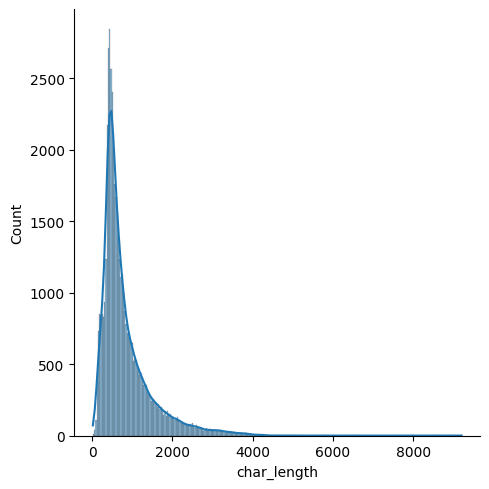

In [ ]:
# Then analysis the both columns char_length and word_length, For know the reviews are positive or negative by the help of these 2 columns

# We can plot displot() for the figure level analysis

sns.displot(df["char_length"], kde=True)

<Axes: xlabel='char_length', ylabel='Count'>

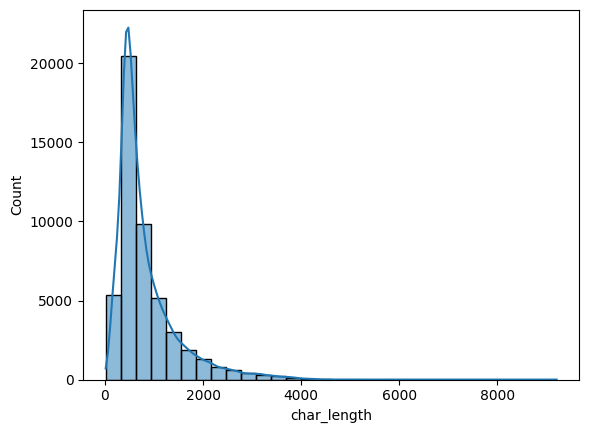

In [ ]:
# Here we see the axis lev
sns.histplot(df["char_length"], kde=True, bins=30)

In the above 2 we see the mainly most of charater length are lie in o to 2000

<Axes: xlabel='char_length', ylabel='Count'>

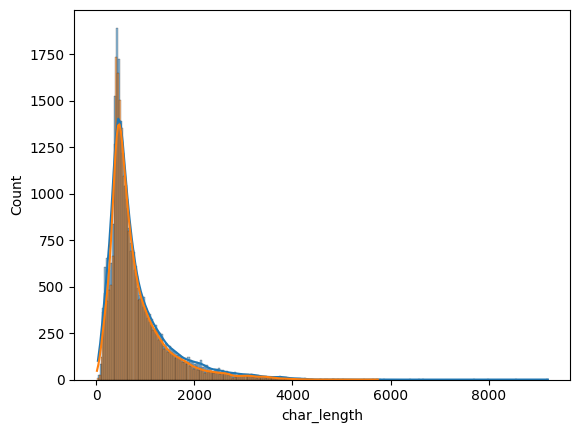

In [73]:
# Now we see the both sentiment analysis, to know the char_length feature engneering is useful or not

sns.histplot(df[df["sentiment"] == "positive"]["char_length"], kde=True)
sns.histplot(df[df["sentiment"] == "negative"]["char_length"], kde=True)


<Axes: xlabel='char_length', ylabel='Count'>

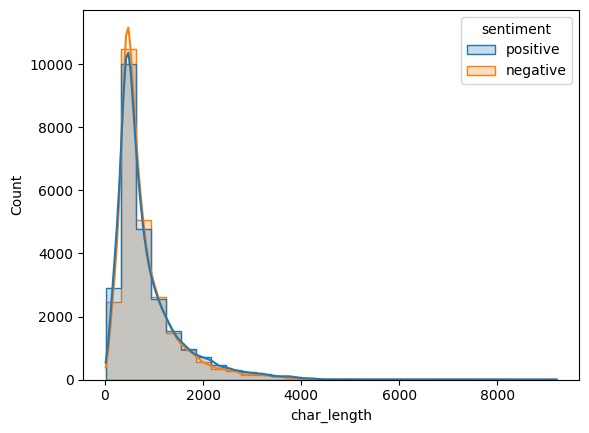

In [74]:
sns.histplot( data=df, x="char_length", hue="sentiment", kde=True, bins=30, element="step")

In the above graph we clearly show the if the word is 500 to 1000 word then the negative review is slightly higher then positive review.

But in the above we cant find much much diffrentieate, That means this feature engneering is not working.

If it show much diffrentiate then it works.

<Axes: xlabel='word_length', ylabel='Count'>

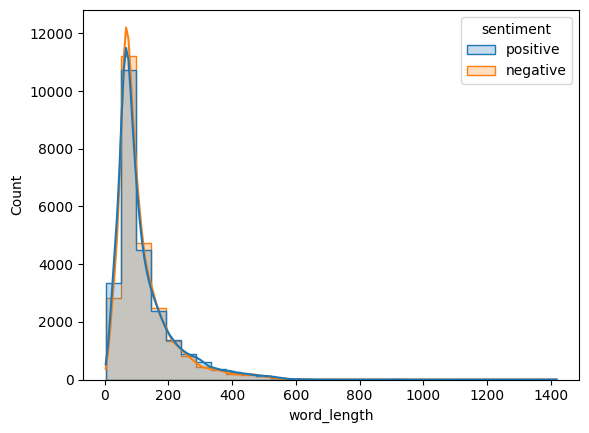

In [75]:
sns.histplot( data=df, x="word_length", hue="sentiment", kde=True, bins=30, element="step")

This also same graph plot